supervised learning ai

predicting acidity content based on varibales in red wine


In [56]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
import seaborn as sb


In [28]:
df = pd.read_csv('winequality-red.csv')

In [29]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [31]:
df.shape

(1599, 12)

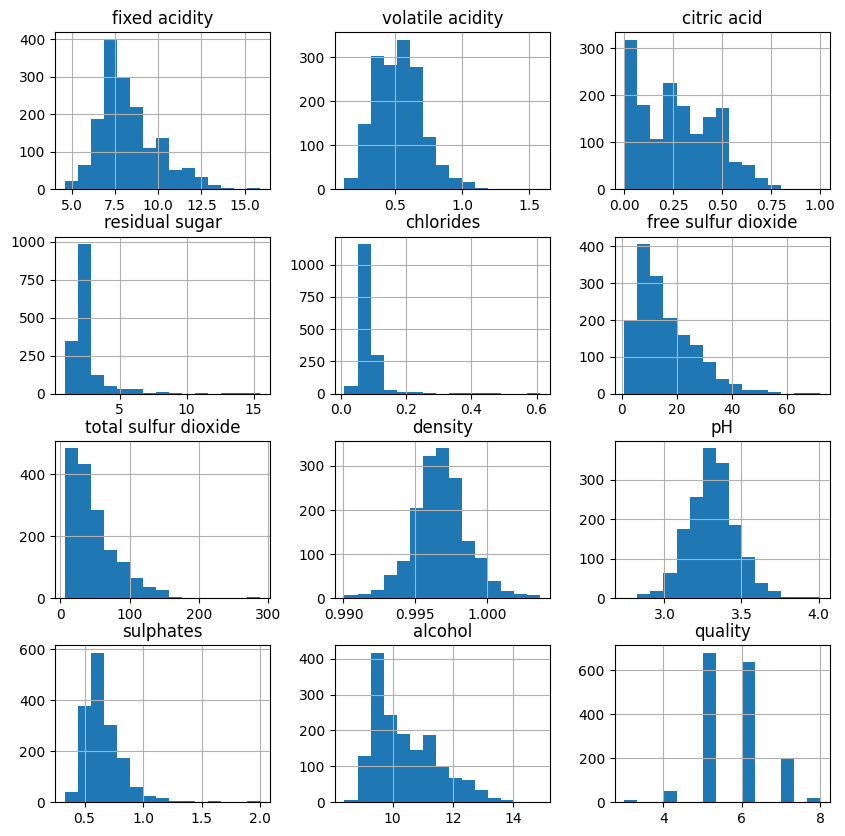

In [32]:
df.hist(bins=15,figsize=(10,10))
plt.show()

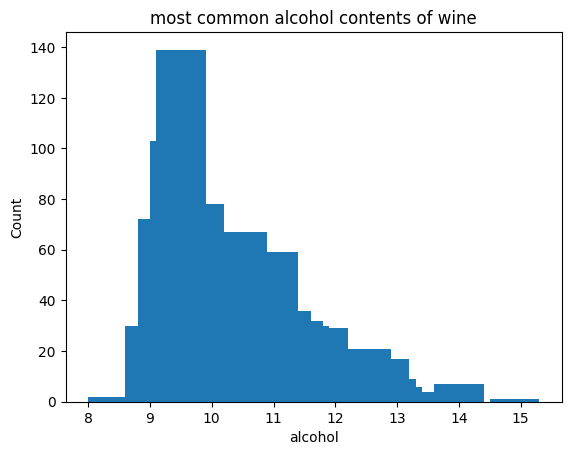

In [33]:
alc_count = df['alcohol'].value_counts().sort_index()
plt.bar(alc_count.index, alc_count.values)
plt.xlabel('alcohol')
plt.ylabel('Count')
plt.title('most common alcohol contents of wine')
plt.show()

In [34]:
#relationship between variables
df.corr()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [35]:
dens = df['density'].values
Acid = df['fixed acidity'].values
qual = df['quality']

C:\Users\rzepa\AppData\Local\Temp\ipykernel_18456\1542001694.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


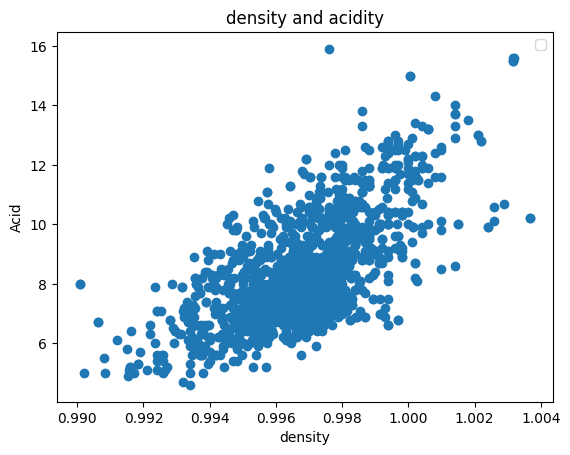

In [36]:
plt.scatter(dens, Acid)
plt.xlabel('density')
plt.ylabel('Acid')
plt.legend()
plt.title('density and acidity')
plt.show()

In [37]:
X1 = dens.reshape(-1,1)
Y2 = Acid

X1_train, X1_test, Y2_train, Y2_test = train_test_split(X1, Y2, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X1_train, Y2_train)
Y2_pred = model.predict(X1_test)


In [38]:
X1_train, X1_test, Y2_train, Y2_test = train_test_split(X1, Y2, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X1_train, Y2_train)

y_pred = model.predict(X1_test)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R^2 Score:", model.score(X1_test, Y2_test))

Coefficients: [613.7022286]
Intercept: -603.3987223525212
R^2 Score: 0.48204937965097794


In [39]:
model.score(X1_train, Y2_train)


0.4363620313210793

In [40]:
Y2_pred = model.predict(X1_test)


Text(0, 0.5, 'predict')

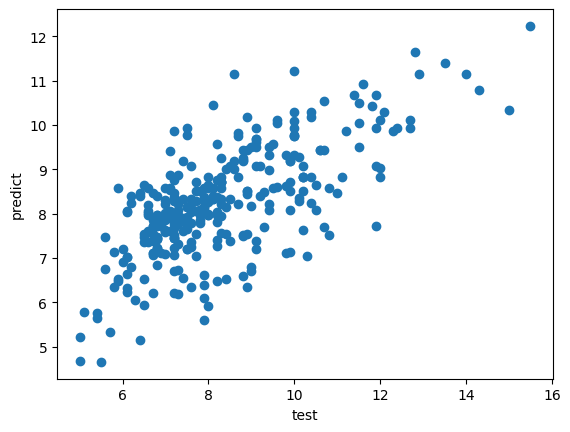

In [41]:
#predicting acidity
plt.scatter(Y2_test, Y2_pred,)
plt.xlabel('test')
plt.ylabel('predict')

C:\Users\rzepa\AppData\Local\Temp\ipykernel_18456\1918519839.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


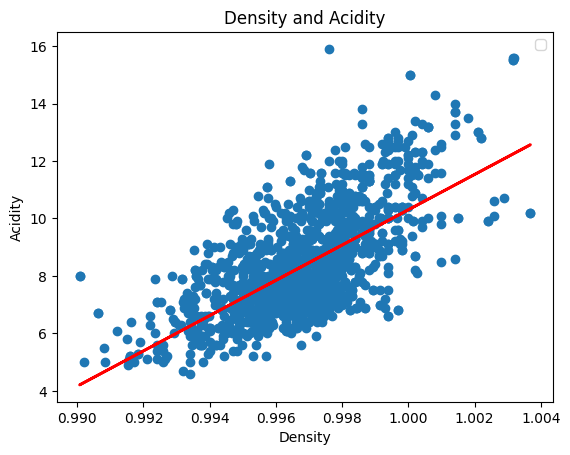

In [42]:
plt.scatter(X1, Y2)
plt.plot(X1, model.predict(X1), color='red', linewidth=2)
plt.xlabel('Density')
plt.ylabel('Acidity')
plt.title('Density and Acidity')
plt.legend()
plt.show()

In [43]:
PH = df['pH'].values
sugar = df['residual sugar'].values
alc = df['alcohol'].values

In [44]:
X = np.column_stack((PH, sugar))  
y = alc

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R^2 Score:", model.score(X_test, y_test))

Coefficients: [1.51537859 0.04335808]
Intercept: 5.288896597922301
R^2 Score: 0.027948067031463353


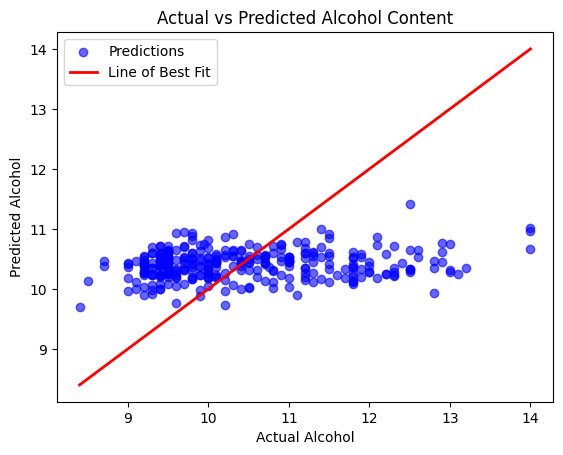

In [45]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Line of Best Fit')
plt.xlabel('Actual Alcohol')
plt.ylabel('Predicted Alcohol')
plt.title('Actual vs Predicted Alcohol Content')
plt.legend()
plt.show()

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming X and y are defined as your features and target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Coefficients, Intercept, and R² Score
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R² Score:", model.score(X_test, y_test))

# Mean Squared Error (MSE) and Mean Absolute Error (MAE)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

# Optionally, if you want to check residuals:
residuals = y_test - y_pred
print("Residuals:", residuals)

Coefficients: [1.51537859 0.04335808]
Intercept: 5.288896597922301
R² Score: 0.027948067031463353
Mean Squared Error: 1.210134790313146
Mean Absolute Error: 0.9022162533781964
Residuals: [-0.70711841 -0.99540293 -0.47640517 -0.63266297  0.10026126 -1.1928509
 -0.61141114 -0.52789995 -0.49406791  0.15346488  1.72452418 -0.79653512
 -0.72615926 -1.219634   -1.03697723  2.01241426 -0.36947425 -0.28114665
  1.51625824 -0.60533464  0.24204736 -1.37202628  1.36213649  2.33481848
 -0.69759238 -1.21408119  1.61041508 -0.23831226 -1.31438276 -0.33277067
 -0.60885911 -0.35861319 -0.6897321  -0.17502707 -0.72530483 -0.93783165
  0.59633112 -0.10540957  0.39818983  1.17347816 -0.08021729 -0.7923703
  0.47646771 -0.3923703  -0.59103527  0.06735857  0.50807845 -0.68236366
  0.43271519 -0.05646683 -1.30611681 -0.96720987  0.537051    2.1426469
 -1.40540957 -1.01874773  0.68077167 -0.32989913  0.37424641 -1.00715027
 -0.27032867  0.4032939  -1.219634   -1.16039697  1.57128871 -1.3344252
  1.52752497 -

Residuals: [ 0.39074713  0.0591658  -1.39688576  0.38717162  2.30159336 -0.3579315
 -1.51627812 -0.26765656 -1.63859515  0.70005191  0.39003734  1.38836106
 -1.34471118 -1.43695883 -0.6223821  -0.88509231 -1.37333023  0.81343501
 -1.25637975  0.3204813 ]


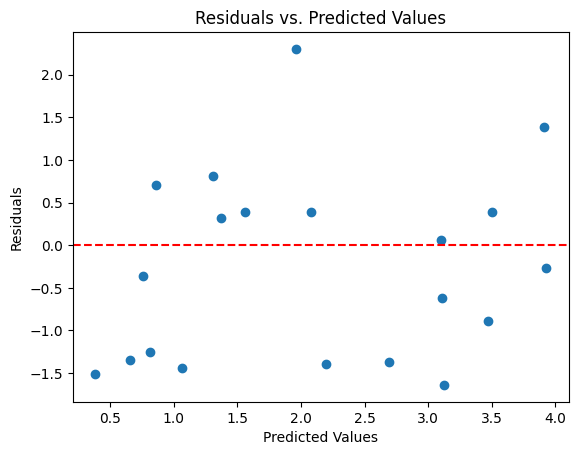

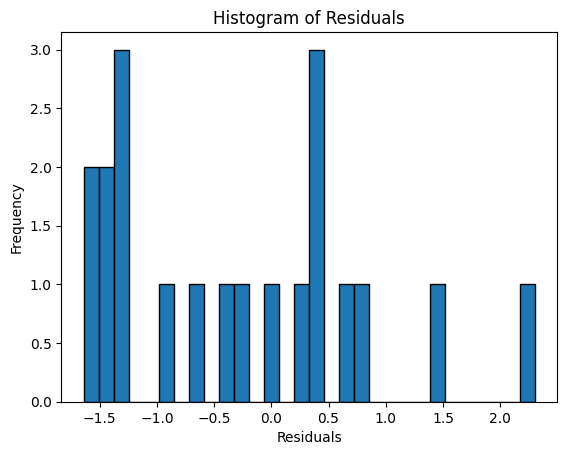

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Example data (replace with your actual data)
X = np.random.rand(100, 2)
y = 3 * X[:, 0] + 2 * X[:, 1] + np.random.randn(100)  # Linear relationship with noise

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Print residuals
print("Residuals:", residuals)

# Plot residuals
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')  # Reference line at 0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

# Optionally, plot a histogram of the residuals
plt.hist(residuals, bins=30, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

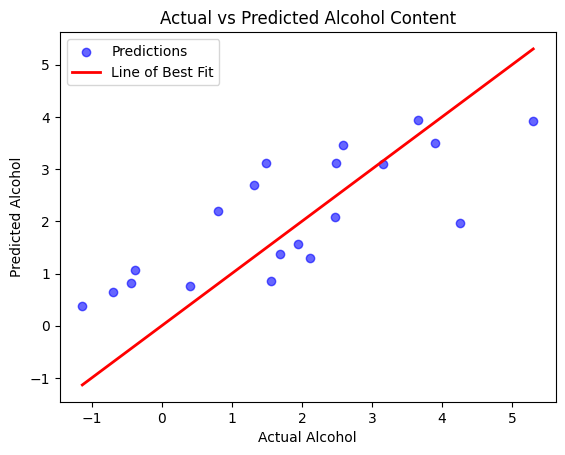

In [48]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Line of Best Fit')
plt.xlabel('Actual Alcohol')
plt.ylabel('Predicted Alcohol')
plt.title('Actual vs Predicted Alcohol Content')
plt.legend()
plt.show()

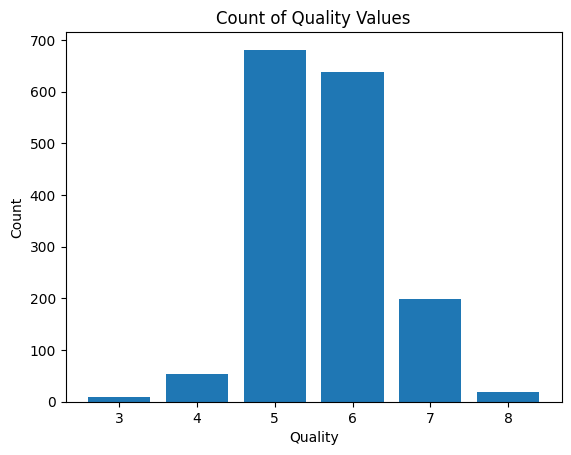

In [49]:
quality_counts = df['quality'].value_counts().sort_index()
plt.bar(quality_counts.index, quality_counts.values)
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Count of Quality Values')
plt.show()

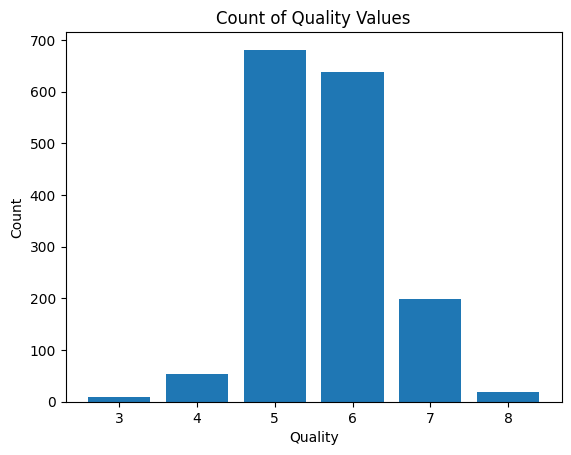

In [50]:
#visualising the quality of wine 
quality_counts = df['quality'].value_counts().sort_index()
plt.bar(quality_counts.index, quality_counts.values)
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Count of Quality Values')
plt.show()

In [51]:
PH = df['pH'].values
Acid = df['fixed acidity'].values
Qual = df['quality'].values

X = np.column_stack((PH, Acid))
y = Qual

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

plt.scatter(X_test[:, 0], y_pred, color='red', label='Predicted')


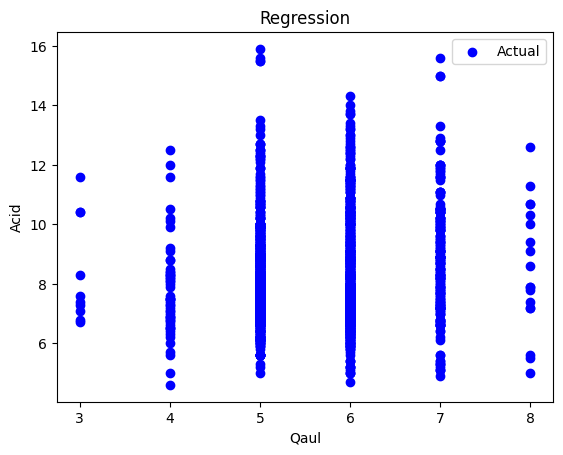

In [52]:

plt.scatter(Qual, Acid, color='blue', label='Actual')
plt.xlabel('Qaul')
plt.ylabel('Acid')
plt.legend()
plt.title('Regression')
plt.show()

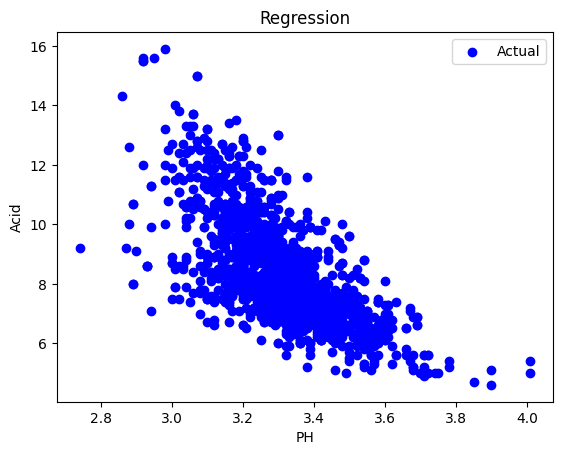

In [53]:
plt.scatter(PH, Acid, color='blue', label='Actual')
plt.xlabel('PH')
plt.ylabel('Acid')
plt.legend()
plt.title('Regression')
plt.show()

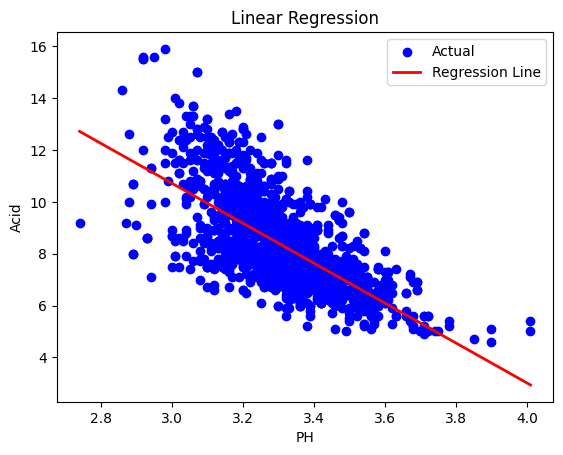

In [54]:
PH = df['pH'].values.reshape(-1, 1)  # Reshape for sklearn compatibility
Acid = df['fixed acidity'].values

# Create and train the linear regression model
model = LinearRegression()
model.fit(PH, Acid)

# Generate predictions for the regression line
PH_range = np.linspace(PH.min(), PH.max(), 500).reshape(-1, 1)  # Smooth range of PH values
Acid_pred = model.predict(PH_range)  # Predicted Acid values

# Plot the scatter and regression line
plt.scatter(PH, Acid, color='blue', label='Actual')
plt.plot(PH_range, Acid_pred, color='red', label='Regression Line', linewidth=2)
plt.xlabel('PH')
plt.ylabel('Acid')
plt.legend()
plt.title('Linear Regression')
plt.show()

NameError: name 'ph_grid' is not defined

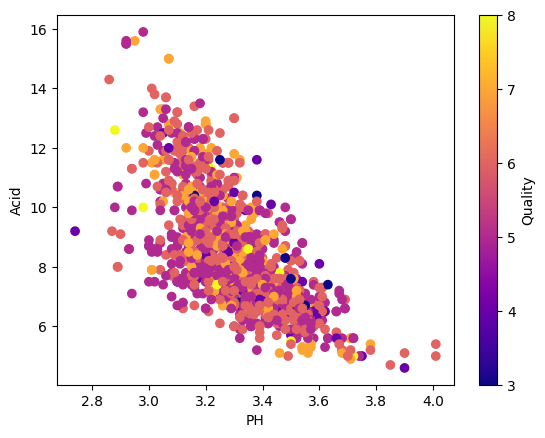

In [55]:
plt.scatter(PH, Acid, c=Qual, cmap='plasma')
plt.colorbar(label='Quality')
plt.xlabel('PH')
plt.ylabel('Acid')
plt.contour(ph_grid, acid_grid, probs, levels=[0.55], colors='black', linewidths=3, label='Logistic Boundary')


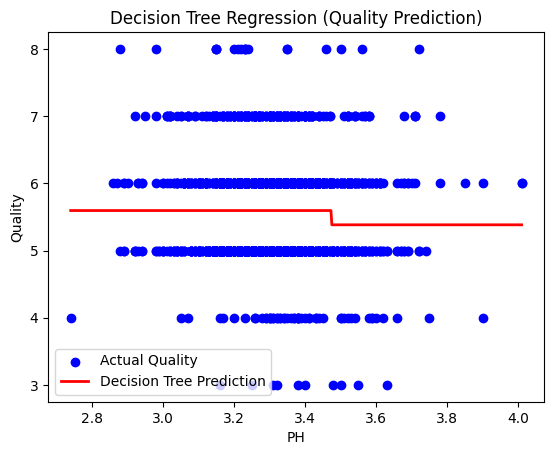

In [272]:
PH = df['pH'].values.reshape(-1, 1)
Acid = df['fixed acidity'].values
X = np.column_stack((PH, Acid))  # Combine PH and Acid into a single feature matrix

# Dependent variable (target)
y = df['quality'].values  # Predicting quality

# Train a Decision Tree Regressor
tree_model = DecisionTreeRegressor(max_depth=3, random_state=42)  # Adjust max_depth for complexity
tree_model.fit(X, y)

# Generate predictions
PH_range = np.linspace(PH.min(), PH.max(), 500).reshape(-1, 1)
Acid_mean = np.full_like(PH_range, Acid.mean())  # Keep Acid constant for visualization
X_range = np.column_stack((PH_range, Acid_mean))
y_pred = tree_model.predict(X_range)

# Plot the results
plt.scatter(PH, y, color='blue', label='Actual Quality')
plt.plot(PH_range, y_pred, color='red', label='Decision Tree Prediction', linewidth=2)
plt.xlabel('PH')
plt.ylabel('Quality')
plt.legend()
plt.title('Decision Tree Regression (Quality Prediction)')
plt.show()

C:\Users\rzepa\AppData\Local\Temp\ipykernel_19560\2469628749.py:21: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(ph_grid, acid_grid, probs, levels=[0.55], colors='red', linewidths=3, label='Logistic Boundary')
C:\Users\rzepa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\colorbar.py:1238: RuntimeWarning: invalid value encountered in divide
  y = y / (self._boundaries[self._inside][-1] -


IndexError: index 1 is out of bounds for axis 0 with size 1

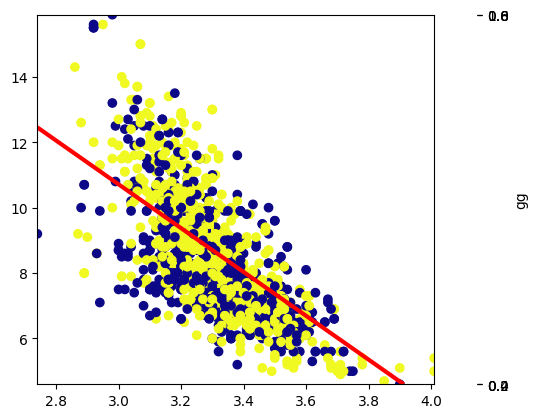

In [273]:
X = np.column_stack((PH, Acid))
y = Qual > Qual.mean()  # Convert Quality to binary (e.g., high/low quality)

# Train logistic regression
log_model = LogisticRegression()
log_model.fit(X, y)

# Generate a grid of PH and Acid values for the curve
ph_range = np.linspace(PH.min(), PH.max(), 100)
acid_range = np.linspace(Acid.min(), Acid.max(), 100)
ph_grid, acid_grid = np.meshgrid(ph_range, acid_range)
grid_points = np.c_[ph_grid.ravel(), acid_grid.ravel()]

# Predict probabilities for the grid
probs = log_model.predict_proba(grid_points)[:, 1]
probs = probs.reshape(ph_grid.shape)

#plot of  data
plt.scatter(PH, Acid, c=y, cmap='plasma')

plt.contour(ph_grid, acid_grid, probs, levels=[0.55], colors='red', linewidths=3, label='Logistic Boundary')

plt.colorbar(label = 'gg')
plt.xlabel('PH')
plt.ylabel('Acid')
plt.title('Regression')
plt.legend()
plt.show()

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_value)
X_train.shape, X_test.shape


((1279, 11), (320, 11))